In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



In [3]:
# Files to Load
mouse_data_to_load = "data/mouse_drug_data.csv"
trial_data_to_load = "data/clinicaltrial_data.csv"

mouse_data = pd.read_csv(mouse_data_to_load)
trial_data = pd.read_csv(trial_data_to_load)

# This list is used throughout to construct various dataframes and plots
drug_list = ["Capomulin","Infubinol","Ketapril","Placebo"]

# Pulls mouse data for only the four drugs above
mouse_data_filtered = mouse_data.loc[mouse_data['Drug'].isin(drug_list)]

# Merges the data, limiting it to only the four drugs
alldata = pd.merge(mouse_data_filtered, trial_data, how='inner',on="Mouse ID")

alldata.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,q119,Ketapril,0,45.000000,0
1,q119,Ketapril,5,47.864440,0
2,q119,Ketapril,10,51.236606,0
3,n923,Ketapril,0,45.000000,0
4,n923,Ketapril,5,45.824881,0


## Tumor Response to Treatment

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_grouped = alldata.groupby(['Drug','Timepoint'])

tumor_vol_avg = drug_grouped["Tumor Volume (mm3)"].mean()
tumor_vol_sem = drug_grouped["Tumor Volume (mm3)"].sem()
metastatic_avg = drug_grouped["Metastatic Sites"].mean()
metastatic_sem = drug_grouped["Metastatic Sites"].sem()
count = drug_grouped["Mouse ID"].count()

# Convert to DataFrame                                                     
drug_grouped_df = pd.DataFrame({"Tumor Vol Avg":tumor_vol_avg,
                                "Tumor Vol Standard Err":tumor_vol_sem,
                                "Metastatic Sites Avg":metastatic_avg,
                                "Metastatic Sites Standard Err":metastatic_sem,
                                "Survival Rate":((count/25)*100)
                               })

# Resets index so its 0 to xxx
drug_grouped_df = drug_grouped_df.reset_index()

# Preview DataFrame
drug_grouped_df.head(10)                                             


,Drug,Timepoint,Tumor Vol Avg,Tumor Vol Standard Err,Metastatic Sites Avg,Metastatic Sites Standard Err,Survival Rate
0,Capomulin,0,45.000000,0.000000,0.000000,0.000000,100.0
1,Capomulin,5,44.266086,0.448593,0.160000,0.074833,100.0
2,Capomulin,10,43.084291,0.702684,0.320000,0.125433,100.0
3,Capomulin,15,42.064317,0.838617,0.375000,0.132048,96.0
4,Capomulin,20,40.716325,0.909731,0.652174,0.161621,92.0
5,Capomulin,25,39.939528,0.881642,0.818182,0.181818,88.0
6,Capomulin,30,38.769339,0.934460,1.090909,0.172944,88.0
7,Capomulin,35,37.816839,1.052241,1.181818,0.169496,88.0
8,Capomulin,40,36.958001,1.223608,1.380952,0.175610,84.0
9,Capomulin,45,36.236114,1.223977,1.476190,0.202591,84.0


In [5]:
# Creates an empty dictionary that will be populated by a dataframe for each drug
drug_dataframes = {}

# Creates a dataframe for each drug that can be used in plotting
for drug in drug_list:
    
    drug_dataframes[drug] = drug_grouped_df[drug_grouped_df["Drug"] == drug]

# Example of dataframe for first drug in drug_list
drug_dataframes[drug_list[0]].head(10)

,Drug,Timepoint,Tumor Vol Avg,Tumor Vol Standard Err,Metastatic Sites Avg,Metastatic Sites Standard Err,Survival Rate
0,Capomulin,0,45.000000,0.000000,0.000000,0.000000,100.0
1,Capomulin,5,44.266086,0.448593,0.160000,0.074833,100.0
2,Capomulin,10,43.084291,0.702684,0.320000,0.125433,100.0
3,Capomulin,15,42.064317,0.838617,0.375000,0.132048,96.0
4,Capomulin,20,40.716325,0.909731,0.652174,0.161621,92.0
5,Capomulin,25,39.939528,0.881642,0.818182,0.181818,88.0
6,Capomulin,30,38.769339,0.934460,1.090909,0.172944,88.0
7,Capomulin,35,37.816839,1.052241,1.181818,0.169496,88.0
8,Capomulin,40,36.958001,1.223608,1.380952,0.175610,84.0
9,Capomulin,45,36.236114,1.223977,1.476190,0.202591,84.0


Text(0, 0.5, 'Average Tumor Volume (mm3)')

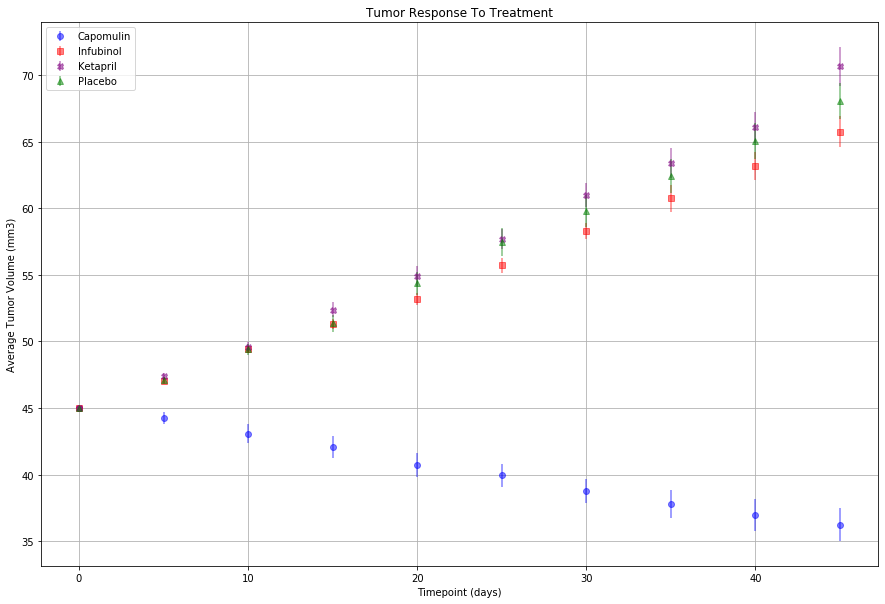

In [6]:
# Creates dictionaries for color and marker for each drug
colors = {drug_list[0]:"blue",
          drug_list[1]:"red",
          drug_list[2]:"purple",
          drug_list[3]:"green"}

markers = {drug_list[0]:"o",
           drug_list[1]:"s",
           drug_list[2]:"X",
           drug_list[3]:"^"}

fig, ax = plt.subplots() 

# Uses the drug dataframes and formatting dictionaries to create plots
for drug in drug_list:

    ax.errorbar((drug_dataframes[drug])["Timepoint"],
                (drug_dataframes[drug])["Tumor Vol Avg"], 
                yerr=(drug_dataframes[drug])["Tumor Vol Standard Err"], 
                fmt= markers[drug], 
                color = colors[drug], 
                label = drug, 
                alpha=0.5)

# This sets size-- .gcf refers to the current plt instance
plt.gcf().set_size_inches(15, 10)

# Completes labeling and formating
plt.legend(loc="best")
plt.grid(True)
plt.title("Tumor Response To Treatment")
plt.xlabel("Timepoint (days)")
plt.ylabel("Average Tumor Volume (mm3)")

## Metastatic Response to Treatment

Text(0, 0.5, 'Average Metastatic Sites')

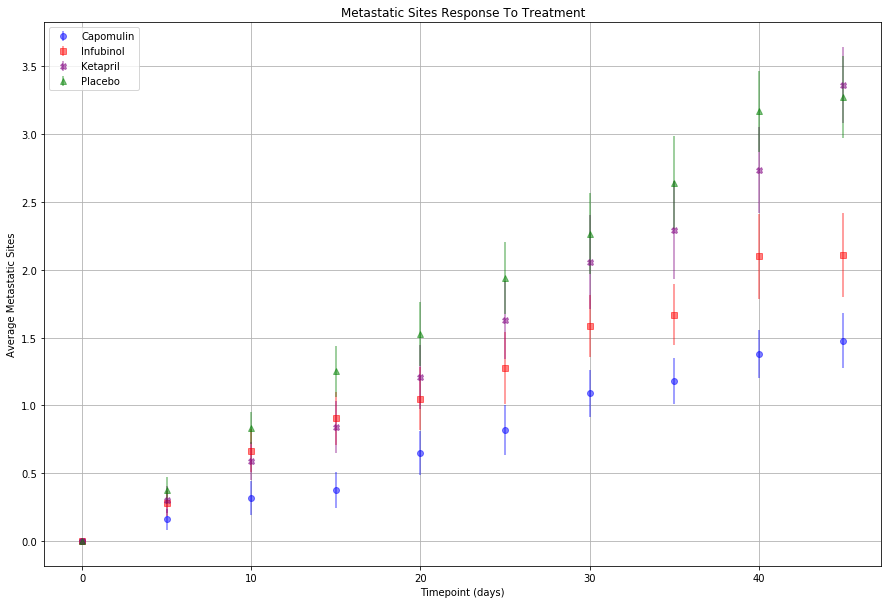

In [7]:
fig, ax = plt.subplots() 

# Uses the drug dataframes and formatting dictionaries to create plots
for drug in drug_list:

    ax.errorbar((drug_dataframes[drug])["Timepoint"],
                (drug_dataframes[drug])["Metastatic Sites Avg"], 
                yerr=(drug_dataframes[drug])["Metastatic Sites Standard Err"], 
                fmt= markers[drug], 
                color = colors[drug], 
                label = drug, 
                alpha=0.5)


# This sets size-- .gcf refers to the current plt instance
plt.gcf().set_size_inches(15, 10)

# Completes labeling and formating
plt.legend(loc="best")
plt.grid(True)
plt.title("Metastatic Sites Response To Treatment")
plt.xlabel("Timepoint (days)")
plt.ylabel("Average Metastatic Sites")

## Survival Rates

Text(0, 0.5, 'Survival Rate (%)')

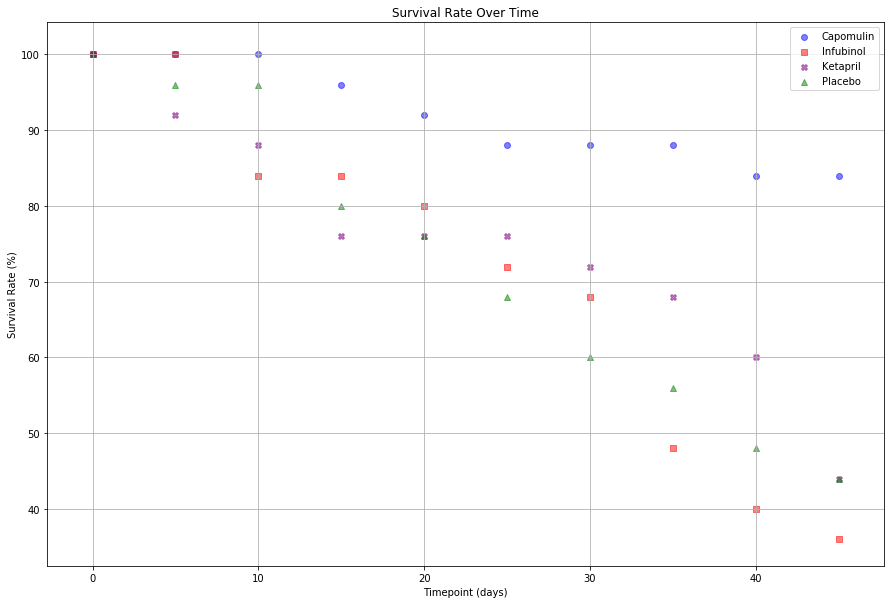

In [37]:
# Uses the drug dataframes and formatting dictionaries to create plots
for drug in drug_list:

    plt.scatter(drug_dataframes[drug]["Timepoint"],
            drug_dataframes[drug]["Survival Rate"], 
            marker= markers[drug], 
            color = colors[drug], 
            label = drug, 
            alpha=0.5)
 

# This sets size-- .gcf refers to the current plt instance
plt.gcf().set_size_inches(15, 10)

# Completes labels and formatting
plt.legend(loc="best")
plt.grid(True)
plt.title("Survival Rate Over Time")
plt.xlabel("Timepoint (days)")
plt.ylabel("Survival Rate (%)")

## Summary Bar Graph

In [38]:
# Creates empty list that will contain percent tumor change for each drug
tumor_change = []

# For each drug, uses .iloc to calculate percent tumor changes and appends to "tumor_change" list.
for drug in drug_list:
    
    pct_tumor_change = ((drug_dataframes[drug].iloc[9,2] - drug_dataframes[drug].iloc[0,2])/drug_dataframes[drug].iloc[0,2])*100
    
    tumor_change.append(pct_tumor_change)

# Creates a data frame that will be used to create bar chart, using the tumor_change list, indexed by drug
tumor_bar_df = pd.DataFrame(tumor_change, columns = ['% Change in Tumors'],index = drug_list)

# Creates a column for the color of the bars, initially setting colors to red
tumor_bar_df['colors'] = 'r'

# Switches the color to green if '% Change in Tumors' is negative or zero
tumor_bar_df.loc[tumor_bar_df['% Change in Tumors']<=0,'colors'] = 'g'

# This is dataframe that will be used to create the bar chart
tumor_bar_df.head()

,% Change in Tumors,colors
Capomulin,-19.475303,g
Infubinol,46.123472,r
Ketapril,57.028795,r
Placebo,51.297960,r


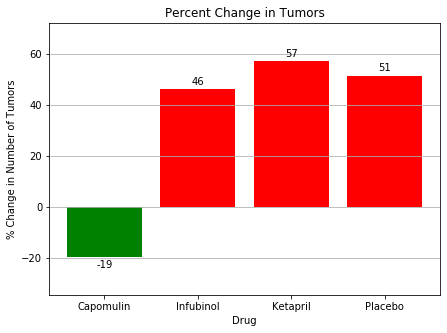

In [39]:
fig, ax = plt.subplots()

# Creates the bar chart from the tumor bar dataframe
rects = ax.bar(tumor_bar_df.index, tumor_bar_df['% Change in Tumors'], color=tumor_bar_df['colors'])


# Adds some text for labels, title and axes ticks
ax.set_ylabel("% Change in Number of Tumors")
ax.set_xlabel("Drug")
ax.set_title("Percent Change in Tumors")

# Sets size of chart, adds grid
plt.gcf().set_size_inches(7, 5)
plt.grid(True, axis = 'y')
plt.ylim((min(tumor_bar_df['% Change in Tumors'])-15), (max(tumor_bar_df['% Change in Tumors'])+15))

# Creates a function for adding labels to each bar
def autolabel(rects, ax):
    
    # Get y-axis height to calculate label position from
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom
    
    # Sets "label_position", which is different depending on if height is positive or negative
    for rect in rects:
        height = rect.get_height()
        label_position = (height + (y_height * 0.01)) if height >= 0  else (height - (y_height * 0.05))

        # Writes the labels at label_position and centers them
        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                '%2d' % (height),
                ha='center', va='bottom')

# Calls the function to create labels
autolabel(rects, ax)